In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/ネットキャッシュ.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'ネットキャッシュ', 'ネットキャッシュ比率'],
      dtype='object')

In [4]:
margin_df = df[['営業CF/売上比率', '販管費/売上比率', '有利子負債/総資産', '流動比率', 'ネットキャッシュ比率',
                 '営業利益率', 'DEレシオ', '売上総利益率']]

margin_df.head()

,営業CF/売上比率,販管費/売上比率,有利子負債/総資産,流動比率,ネットキャッシュ比率,営業利益率,DEレシオ,売上総利益率
0,20.0,46.4,20.6,166.5,7.67,10.3,0.5,55.3
1,38.2,9.4,NaN,727.5,19.79,46.3,NaN,71.0
2,15.7,44.5,6.9,203.5,23.07,11.8,0.1,57.5
3,12.0,18.9,6.3,111.7,0.22,9.9,0.1,28.8
4,12.2,19.1,5.8,68.2,1.12,10.7,0.3,28.2


In [5]:
margin_df.describe()

,営業CF/売上比率,販管費/売上比率,有利子負債/総資産,流動比率,ネットキャッシュ比率,営業利益率,DEレシオ,売上総利益率
count,494.000000,441.000000,456.000000,454.000000,459.000000,445.000000,456.000000,441.000000
mean,23.325304,23.265079,25.655702,225.294493,21.793682,11.736180,1.720614,34.790249
std,60.044238,16.589475,21.987438,157.884058,16.715878,11.205304,4.919539,19.568319
min,0.100000,1.600000,0.000000,23.600000,0.030000,0.000000,0.000000,1.300000
25%,7.350000,11.500000,8.050000,127.975000,7.955000,5.200000,0.100000,19.800000
50%,11.800000,19.700000,19.900000,182.800000,18.510000,8.900000,0.400000,30.800000
75%,18.025000,29.000000,38.625000,265.375000,33.000000,13.900000,1.125000,45.600000
max,745.100000,136.600000,90.500000,1227.400000,81.390000,112.800000,62.000000,93.800000


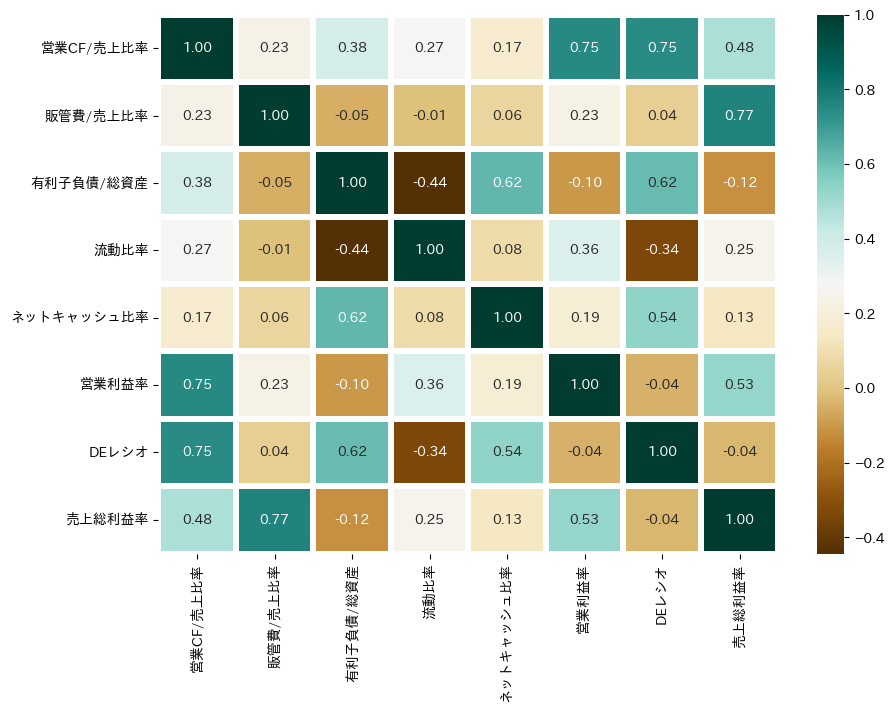

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = margin_df.corr()

plt.figure(figsize = (10, 7))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [7]:
margin_df.dropna(inplace=True)

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_19459/1926443711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin_df.dropna(inplace=True)


In [8]:
# X = margin_df.drop(columns=['売上総利益率'])
X = margin_df[['販管費/売上比率', '営業CF/売上比率']]
y = margin_df['売上総利益率']

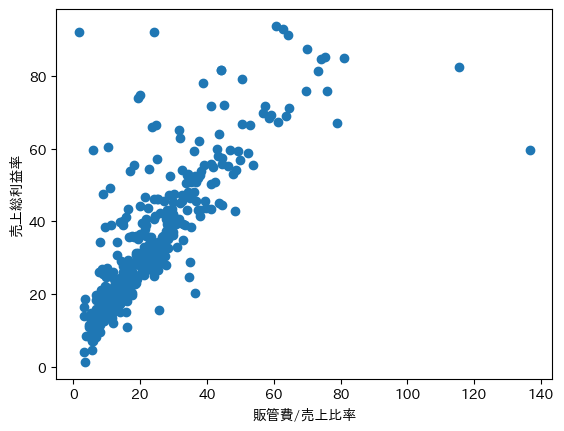

In [9]:
plt.xlabel('販管費/売上比率')
plt.ylabel('売上総利益率')
plt.scatter(x=margin_df['販管費/売上比率'], y=margin_df['売上総利益率'])

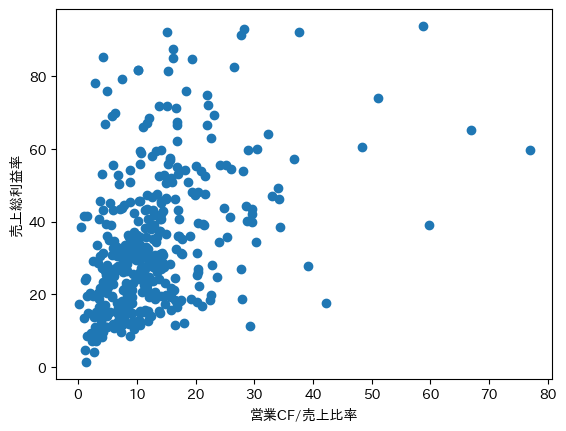

In [10]:
plt.xlabel('営業CF/売上比率')
plt.ylabel('売上総利益率')
plt.scatter(x=margin_df['営業CF/売上比率'], y=margin_df['売上総利益率'])

In [11]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.55230172 0.78719249 0.82657912 0.47912008 0.6233532 ]
平均決定係数 (R²): 0.6537093226593866
平均二乗誤差 (MSE) scores: [-145.65825759  -76.23156447  -36.66762539 -234.75813322 -155.44104895]
平均二乗誤差 (MSE): -129.7513259237989
平均絶対誤差 (MAE) scores: [-7.74822526 -5.86840355 -4.59755162 -6.26135454 -7.15101365]
平均絶対誤差 (MAE): -6.325309721664336


In [12]:
from sklearn.model_selection import train_test_split

sc = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [14.01429272  4.58806932]
切片: 34.910576923076924


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr.predict(X_test)

# 評価指標の表示
print("決定係数 (R²):", r2_score(y_test, y_pred))
print("平均二乗誤差 (MSE):", mean_squared_error(y_test, y_pred))
print("平均絶対誤差 (MAE):", mean_absolute_error(y_test, y_pred))

決定係数 (R²): 0.7182308172115328
平均二乗誤差 (MSE): 79.00479568532789
平均絶対誤差 (MAE): 6.002087852353484


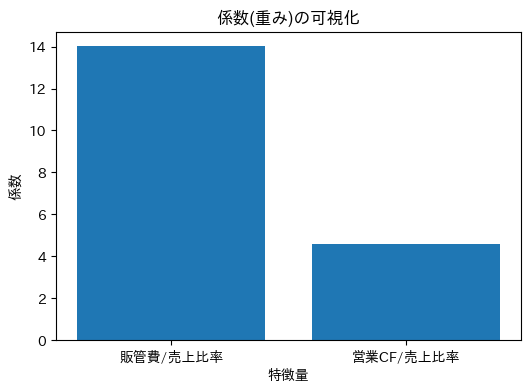

In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib


feature_names = X.columns


coefficients = lr.coef_

plt.figure(figsize=(6, 4))
plt.bar(feature_names, coefficients)
plt.xlabel('特徴量')
plt.ylabel('係数')
plt.title('係数(重み)の可視化')
plt.show()

In [15]:
X

,販管費/売上比率,営業CF/売上比率
0,46.4,20.0
2,44.5,15.7
3,18.9,12.0
4,19.1,12.2
7,8.9,9.3
...,...,...
494,39.8,7.5
495,34.8,7.7
497,58.5,12.0
498,60.8,58.7


In [16]:
# 販管費/売上比率, 営業CF/売上比率

X_new = np.array([
    [57.15, 17.22], # アドバン
    [13.2, 10.7], # ナレル
    [20, 10.69],
    [27.12, 10.22]
])


X_new_sc = sc.transform(X_new)

lr_pred = lr_fit.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.53232952, 25.05058004, 30.53403932, 36.06332757])

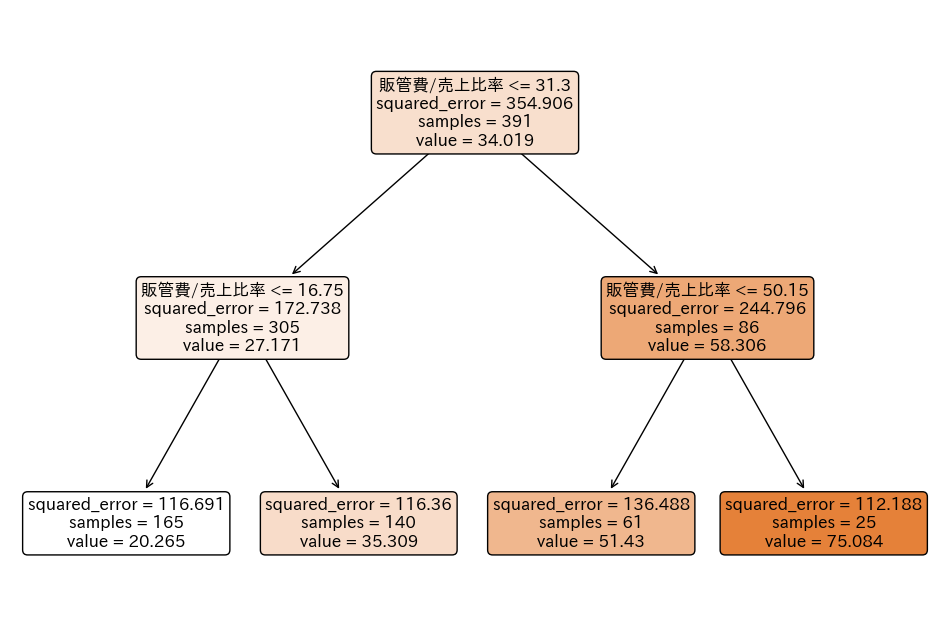

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(12, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()
